# Wind Turbine Power Production Algorithm Walkthrough

### Introduction
This notebook contains a 'machine learning' algorithm used to predict power production based on wind speeds. This is done by training the machine using the **Power_Production_Dataset.txt** file which contains a two column list of *speed* and *power*. 
***

In [1]:
# Imports necessary for project algorithm
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as skcl
import scipy.spatial as spatial
import tensorflow.keras as kr
from sklearn.cluster import DBSCAN
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Model

In [2]:
# Stores the path to the Power Production Data set
fileName = "..\Dataset\Power_Production_Dataset.txt" # Text files path
# Load the text into a numpy array and split by ','
data = np.loadtxt(fileName, skiprows=1, delimiter=',')
# Display data
data

array([[0.00000e+00, 0.00000e+00],
       [1.25000e-01, 0.00000e+00],
       [1.50000e-01, 0.00000e+00],
       [2.25000e-01, 0.00000e+00],
       [2.75000e-01, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [7.26000e-01, 0.00000e+00],
       [7.51000e-01, 0.00000e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.02600e+00, 0.00000e+00],
       [1.05100e+00, 2.08500e+00],
       [1.07600e+00, 0.00000e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00,

In [3]:
# Make x and y the speed and power columns
x = data[:,0]
y = data[:,1]

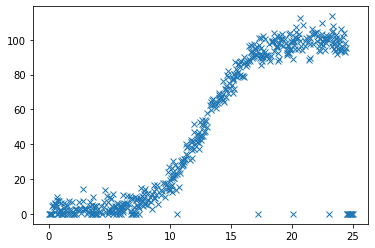

In [4]:
# Plot the data set.
plt.plot(x, y, 'x')
# Show plot
plt.show()

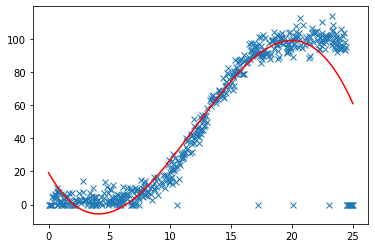

In [5]:
# Polyfit used to demonstrate in plot what kind of prediction we are looking for
a, b, c, d = np.polyfit(x, y, 3)
# Plot the data set
plt.plot(x, y, 'x')
# Plot a rough 'prediction' using the cubic equation [1]
plt.plot(x, ((a*x*x*x) + (b*x*x) + (c*x) + d), 'r-')
# Show plot
plt.show()

## Removing the Outliers
With our dataset loaded in we can now train our machine to make predictions. However, there are a few outliers present in our daaset which will be taken into account in our predictions. In order to make a more accurate prediction we should first remove the outliers present in our dataset.

In [6]:
# Load in our data using pandas
newData = pd.read_csv(fileName)
# Create a copy of the dataset for training
trainSet = newData

# Create an empty list
dis = []
# i and j are used to count the entries in our dataset
i = 0
j = i+1

# for each entry in out set 
for a in trainSet.values:
    # Calculate the distance between points i, j
    c = spatial.distance.pdist(np.array([trainSet.values[i], trainSet.values[j]]), "euclidean")
    # Append the distance to out list
    dis.append(c[0])
    
    # End before the last index
    if j == trainSet["speed"].values.size - 1:
        break
        
    # Increment index values
    i += 1
    j = i+1

# Calculate the mean distance between the sum of all points
mean_dis = np.mean(dis)
# Mean distance between 2 points
mean_dis    

5.6731936201644775

### Marking the outliers
Using DBSCAN [2] and the mean distance between two points we will calculate the outliers in our training dataset. We will then create a new smaller set which contains only the outliers.

In [7]:
# Use DBSCAN on with the mean_dis on the trainSet
clustering = DBSCAN(eps=mean_dis, min_samples=19).fit(trainSet)

# Find the data outliers using noise (-1)
outliers = np.where(clustering.labels_ == -1)
outliers = outliers[0]

# Retrieve outlier data
outlierData = trainSet.values[outliers]

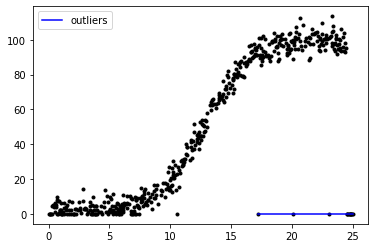

In [8]:
# Plot the training set and the outliers, marking the outliers for demostration
plt.plot(trainSet.values[:,0], trainSet.values[:,1], 'k.')
plt.plot(outlierData[:,0], outlierData[:,1], color='blue', label='outliers')
plt.legend()
plt.show()

In [9]:
# New data set that removes the outliers
finalDataSet = trainSet.drop(outliers)
# Set x1 and y1 to correspond to speed and power
x1 = finalDataSet.values[:,0]
y1 = finalDataSet.values[:,1]

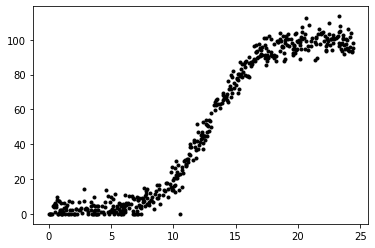

In [10]:
# Plot the finalDataset without the outliers
plt.plot(x1, y1, 'k.')
plt.show()

## Neural Network and Predictions
Using Keras [4] from Tensorflow [5] I created a neural network with one neuron. Then using x1 and y1 from our finalDataset I made predictions using the sigmoid function [6].

In [16]:
# Create a neural network using keras from tensorflow
model = kr.models.Sequential()
model.add(kr.layers.Dense(25, input_shape=(1,), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros"))
model.add(kr.layers.Dense(100, input_shape=(1,), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros"))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer="ones", bias_initializer="zeros"))

# Compile and fit (train & predict)
model.compile('adam', loss='mean_squared_error')
model.fit(x1, y1, epochs=250,  batch_size=10)

Epoch 1/250
49/49 [==============================] - 0s 896us/step - loss: 4287.7369
Epoch 2/250
49/49 [==============================] - 0s 812us/step - loss: 3957.3110
Epoch 3/250
49/49 [==============================] - 0s 833us/step - loss: 3070.8629
Epoch 4/250
49/49 [==============================] - 0s 771us/step - loss: 3046.3498
Epoch 5/250
49/49 [==============================] - 0s 812us/step - loss: 2717.5414
Epoch 6/250
49/49 [==============================] - 0s 792us/step - loss: 2743.4887
Epoch 7/250
49/49 [==============================] - 0s 854us/step - loss: 2591.5874
Epoch 8/250
49/49 [==============================] - 0s 833us/step - loss: 2273.5998
Epoch 9/250
49/49 [==============================] - 0s 854us/step - loss: 2006.7973
Epoch 10/250
49/49 [==============================] - 0s 812us/step - loss: 2084.7867
Epoch 11/250
49/49 [==============================] - 0s 813us/step - loss: 2074.6608
Epoch 12/250
49/49 [==============================] - 0s 854us/

49/49 [==============================] - 0s 791us/step - loss: 29.5416
Epoch 98/250
49/49 [==============================] - 0s 812us/step - loss: 28.1279
Epoch 99/250
49/49 [==============================] - 0s 812us/step - loss: 24.3091
Epoch 100/250
49/49 [==============================] - 0s 792us/step - loss: 26.7849
Epoch 101/250
49/49 [==============================] - 0s 875us/step - loss: 26.1340
Epoch 102/250
49/49 [==============================] - 0s 916us/step - loss: 27.1386
Epoch 103/250
49/49 [==============================] - 0s 916us/step - loss: 27.3003
Epoch 104/250
49/49 [==============================] - 0s 874us/step - loss: 25.2329
Epoch 105/250
49/49 [==============================] - 0s 833us/step - loss: 26.1637
Epoch 106/250
49/49 [==============================] - 0s 792us/step - loss: 25.5431
Epoch 107/250
49/49 [==============================] - 0s 834us/step - loss: 26.4712
Epoch 108/250
49/49 [==============================] - 0s 792us/step - loss: 23.5

49/49 [==============================] - 0s 793us/step - loss: 17.5662
Epoch 194/250
49/49 [==============================] - 0s 785us/step - loss: 18.2390
Epoch 195/250
49/49 [==============================] - 0s 816us/step - loss: 19.2944
Epoch 196/250
49/49 [==============================] - 0s 824us/step - loss: 17.8223
Epoch 197/250
49/49 [==============================] - 0s 836us/step - loss: 18.2505
Epoch 198/250
49/49 [==============================] - 0s 772us/step - loss: 18.2684
Epoch 199/250
49/49 [==============================] - 0s 809us/step - loss: 24.1315
Epoch 200/250
49/49 [==============================] - 0s 829us/step - loss: 20.0197
Epoch 201/250
49/49 [==============================] - 0s 817us/step - loss: 18.4532
Epoch 202/250
49/49 [==============================] - 0s 834us/step - loss: 15.6671
Epoch 203/250
49/49 [==============================] - 0s 831us/step - loss: 16.4609
Epoch 204/250
49/49 [==============================] - 0s 830us/step - loss: 17

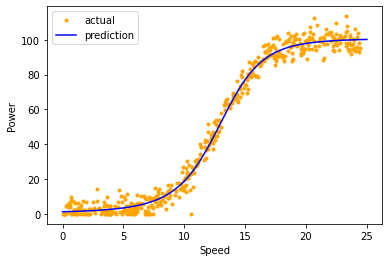

In [17]:
# Plot prediction model with finaDataSet x1 and y1
plt.plot(x1, y1, '.', color="orange", label="actual")
plt.plot(newData['speed'], model.predict(newData['speed']), color="blue", label="prediction")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.show()

In [18]:
# Evalute the accruacy of the model
model.evaluate(x1, y1)

16/16 [==============================] - 0s 732us/step - loss: 18.4866


18.486614227294922

In [19]:
# Save the model as 'model.h5' (as requested)
model.save("model.h5")

## User Input Prediction
Below is a quick python script that takes in user input (wind speed) and makes a prediction of the power generated.

In [20]:
# Test Run Prediction with user input
user = int(input("Your wind speed please: "))
finalDataSet['speed'] = user
finalDataSet['power'] = model.predict(finalDataSet['speed'])
prediction = finalDataSet['power'][0]
print("Predicted Power Generated: ", prediction)

Your wind speed please: 10
Predicted Power Generated:  18.862211


## References

[1] - [Cubic Equation](https://www.storyofmathematics.com/solving-cubic-equations#:~:text=A%20cubic%20equation%20is%20an,and%20d%20is%20the%20constant.)

[2] - [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

[3] - [Skilearn - Regression](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

[4] - [Keras](https://keras.io/)

[5] - [Tensorflow](https://www.tensorflow.org/)

[6] - [Sigmoid Function](https://en.wikipedia.org/wiki/Sigmoid_function)

***